# App Store 数据分析
## 简介

本次分析的数据集是 [Mobile App Store (7200 apps)](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps)，取自 IOS app 商店的数据信息。其中包含了以下数据特征：

**appleStore.csv**

- `id`: App ID
- `track_name`: App 名称
- `size_bytes`: 大小 (以 Bytes 为单位)
- `currency`: 价格货币单位
- `price`: APP 价格
- `rating_count_tot`: 用户评分数量 (所有版本的总计)
- `rating_count_ver`: 用户评分数量 (当前版本)
- `user_rating`: 用户平均评分 (所有版本)
- `user_rating_ver`: 用户平均评分 (当前版本)
- `ver`: 最新版本号
- `cont_rating`: 内容评级
- `prime_genre`: 主要类型
- `sup_devices.num`: 支持设备数量
- `ipadSc_urls.num`: 展示截图的数量
- `lang.num`: 支持语言的数量
- `vpp_lic`: Vpp Device Based Licensing Enabled

**appleStore_description.csv**

- `id`: App ID
- `track_name`: App 名称
- `size_bytes`: 大小 (以 Bytes 为单位)
- `app_desc`: APP 描述文字

导入数据进行初步了解：

In [1]:
# 导入常用库
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

In [2]:
# 读取数据集
df_desc = pd.read_csv('appleStore_description.csv')
df_app = pd.read_csv('AppleStore.csv')

In [3]:
df_desc.sample(1)

,id,track_name,size_bytes,app_desc
2584,853834250,Peggle Blast,454746112,APP STORE EDITORS’ CHOICE\n\nTake your best sh...


In [4]:
df_app.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
Unnamed: 0          7197 non-null int64
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(9), object(5)
memory usage: 955.9+ KB


In [5]:
df_desc.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 4 columns):
id            7197 non-null int64
track_name    7197 non-null object
size_bytes    7197 non-null int64
app_desc      7197 non-null object
dtypes: int64(2), object(2)
memory usage: 225.0+ KB


### 提出想要探索的问题：

- 这些 APP 的价格分布如何，免费应用所占比例是多少？
- 总评分与价格有没有相关性？
- 游戏类与非游戏类 APP 的收费情况？
- 游戏类与非游戏类 APP 的评分分布差异？


## 数据整理
### 数据评估

In [6]:
df_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 4 columns):
id            7197 non-null int64
track_name    7197 non-null object
size_bytes    7197 non-null int64
app_desc      7197 non-null object
dtypes: int64(2), object(2)
memory usage: 225.0+ KB


In [7]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
Unnamed: 0          7197 non-null int64
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(9), object(5)
memory usage: 955.9+ KB


In [8]:
df_desc.id.duplicated().sum()

0

In [9]:
df_app.id.duplicated().sum()

0

In [10]:
df_app.describe()

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,4759.069612,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,3093.625213,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,1.000000,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,2090.000000,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,4380.000000,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,7223.000000,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,11097.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


In [11]:
# df_app['price'].value_counts() 

In [12]:
# 可以进行 cut 分段

(pd.cut(df_app['price'], [0,2,4,6,300])).value_counts()

(0, 2]      1349
(2, 4]       960
(4, 6]       446
(6, 300]     386
Name: price, dtype: int64

In [13]:
df_app['user_rating'].value_counts()

4.5    2663
4.0    1626
0.0     929
3.5     702
5.0     492
3.0     383
2.5     196
2.0     106
1.5      56
1.0      44
Name: user_rating, dtype: int64

In [14]:
df_app['user_rating_ver'].value_counts()

4.5    2205
0.0    1443
4.0    1237
5.0     964
3.5     533
3.0     304
2.5     176
2.0     136
1.0     125
1.5      74
Name: user_rating_ver, dtype: int64

In [15]:
df_app.shape

(7197, 17)

In [16]:
df_app['prime_genre'].value_counts()/df_app.shape[0]

Games                0.536612
Entertainment        0.074337
Education            0.062943
Photo & Video        0.048492
Utilities            0.034459
Health & Fitness     0.025010
Productivity         0.024733
Social Networking    0.023204
Lifestyle            0.020008
Music                0.019175
Shopping             0.016952
Sports               0.015840
Book                 0.015562
Finance              0.014450
Travel               0.011255
News                 0.010421
Weather              0.010004
Reference            0.008893
Food & Drink         0.008754
Business             0.007920
Navigation           0.006392
Medical              0.003196
Catalogs             0.001389
Name: prime_genre, dtype: float64

In [17]:
df_app.cont_rating.unique()

array(['4+', '12+', '17+', '9+'], dtype=object)

In [18]:
df_app.cont_rating.value_counts()

4+     4433
12+    1155
9+      987
17+     622
Name: cont_rating, dtype: int64

### 数据清洗

针对最开始提出的问题，以及对数据的更详细的评估我们可以对数据进行以下处理：

- 将 `df_desc` 中的 `app_desc` 列合并到 `df_app` 中
- 删除不需要的数据列（`Unnamed: 0`,`currency`,`vpp_lic`）
- 将列名中的 `.` 修改为 `_`
- `id` 列修改为字符串类型
- 对 `prize` 进行 `cut` 分段，创建新的分类变量 `price_cut`

In [19]:
df_app.head(1)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1


In [20]:
df_desc.head(1)

,id,track_name,size_bytes,app_desc
0,281656475,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."


In [21]:
df = pd.merge(df_app,df_desc[['id','app_desc']],on='id')
# df.info()

In [22]:
df.head(1)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n..."


In [23]:
df.drop(['Unnamed: 0','currency','vpp_lic'],axis=1,inplace=True)
df = df.rename(columns={c: c.replace('.', '_') for c in df_app.columns})
df.columns

Index(['id', 'track_name', 'size_bytes', 'price', 'rating_count_tot',
       'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver',
       'cont_rating', 'prime_genre', 'sup_devices_num', 'ipadSc_urls_num',
       'lang_num', 'app_desc'],
      dtype='object')

In [24]:
df.id = df.id.astype('str')

In [25]:
price_labels = ['Free','USD:0~5','USD:5~20','USD:20+']
df['price_cut'] = pd.cut(df['price'],bins=[-1,0,5,20,300],labels=price_labels)

In [26]:
df['price_cut'].value_counts()

Free        4056
USD:0~5     2703
USD:5~20     402
USD:20+       36
Name: price_cut, dtype: int64

In [27]:
df['is_Game'] = df['prime_genre'] == 'Games'
df['is_Game'].replace([True,False],['Games','NotGames'],inplace=True)

In [28]:
df['is_Game'].value_counts()

Games       3862
NotGames    3335
Name: is_Game, dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 0 to 7196
Data columns (total 17 columns):
id                  7197 non-null object
track_name          7197 non-null object
size_bytes          7197 non-null int64
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices_num     7197 non-null int64
ipadSc_urls_num     7197 non-null int64
lang_num            7197 non-null int64
app_desc            7197 non-null object
price_cut           7197 non-null category
is_Game             7197 non-null object
dtypes: category(1), float64(3), int64(6), object(7)
memory usage: 963.1+ KB


In [30]:
df.head(2)

,id,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices_num,ipadSc_urls_num,lang_num,app_desc,price_cut,is_Game
0,281656475,PAC-MAN Premium,100788224,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,"SAVE 20%, now only $3.99 for a limited time!\n...",USD:0~5,Games
1,281796108,Evernote - stay organized,158578688,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,Let Evernote change the way you organize your ...,Free,NotGames


在数据清洗后，获得了一份整洁的数据集，可以用来探索最开始提出的问题：

## 探索数据
### APP 的价格分布如何，免费应用所占比例是多少？

/Users/Ran/anaconda3/envs/py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/Ran/anaconda3/envs/py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


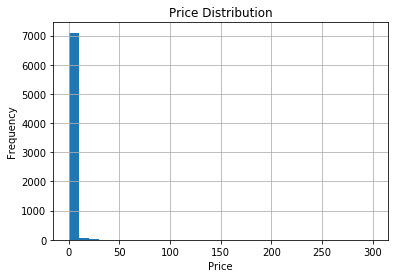

In [31]:
# 可以筛选价格查看 
# df_test = df['price'][df['price'] < 50]
# df['price'] 使用 df_test 替换

df['price'].hist(bins=30,figsize=(6,4))
plt.title('Price Distribution')
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.show();

可以看出 price 是非常偏斜的分布，大部分都在0-20的范围内。

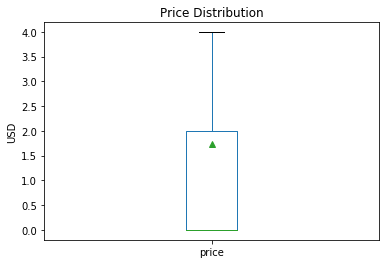

In [32]:
# showfliers=False 不显示离群值

df['price'].plot.box(showfliers=False,showmeans=True,figsize=(6,4))
plt.title('Price Distribution')
plt.ylabel('USD');

使用箱线图将离群值隐藏之后，可以发现大部分的价格都在 5 美元以下。

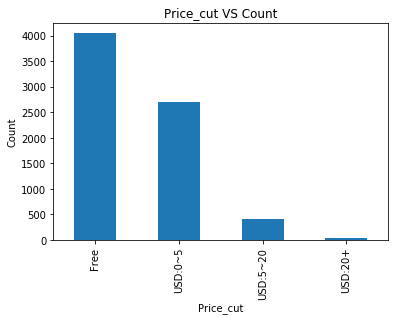

In [33]:
df.price_cut.value_counts().plot.bar(figsize=(6,4))
plt.title('Price_cut VS Count')
plt.ylabel('Count')
plt.xlabel('Price_cut');

图中可以明确看到分类变量各个类别的数量对比，在价格段 `price_cut` 这列数据中，占据绝大多数的类别是免费和5元以下。

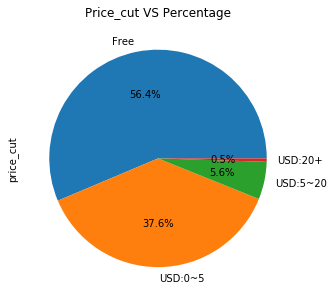

In [34]:
df.price_cut.value_counts().plot.pie(autopct='%.1f%%',figsize=(5,5))
plt.title('Price_cut VS Percentage')
plt.show();

# 使最小的扇形不显示百分比
# df.price_cut.value_counts().plot.pie(autopct=lambda pct:'' if pct< 1 else "{:.1f}%".format(pct),figsize=(5,5))
# plt.title('Price_cut VS Percentage')
# plt.show();

饼图中可以明确看出，免费应用占比为 56.4%，占据一半以上。

### 总评分与价格有没有相关性？

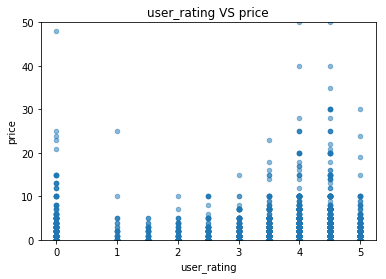

In [35]:
df.plot.scatter(x='user_rating',y='price',alpha=0.5)
plt.title('user_rating VS price')
plt.ylim(0,50);

`price` 的分布存在一些极端值，所以使用 `ylim` 做了限制。因为 `user_rating` 实际上是离散数值，所以出现了一条一条的散点分布情况。
图中没有办法观察出明显的相关趋势。

我们使用 corr 计算一下相关系数：

In [36]:
df['price'].corr(df['user_rating'])

0.046601003621424955

可以看到确实相关系数很小，小于0.05。使用 `df.corr()` 可以看到所有数值变量之间的相关系数，可以观察一下有没有较大的相关系数：

In [37]:
df.corr()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices_num,ipadSc_urls_num,lang_num
size_bytes,1.000000,0.182392,0.004486,0.006337,0.066256,0.086075,-0.118347,0.152697,0.004614
price,0.182392,1.000000,-0.039044,-0.018012,0.046601,0.025173,-0.115361,0.066100,-0.006713
rating_count_tot,0.004486,-0.039044,1.000000,0.163645,0.083310,0.088744,0.008832,0.015734,0.137675
rating_count_ver,0.006337,-0.018012,0.163645,1.000000,0.068754,0.077840,0.037951,0.024333,0.013287
user_rating,0.066256,0.046601,0.083310,0.068754,1.000000,0.774140,-0.042451,0.265671,0.170976
user_rating_ver,0.086075,0.025173,0.088744,0.077840,0.774140,1.000000,-0.018901,0.275737,0.175580
sup_devices_num,-0.118347,-0.115361,0.008832,0.037951,-0.042451,-0.018901,1.000000,-0.037728,-0.041681
ipadSc_urls_num,0.152697,0.066100,0.015734,0.024333,0.265671,0.275737,-0.037728,1.000000,0.088378
lang_num,0.004614,-0.006713,0.137675,0.013287,0.170976,0.175580,-0.041681,0.088378,1.000000


可以看到这些数值变量之间，只有 `user_rating` 和 `user_rating_ver` 之间的相关系数比较大，其他都没有超过 0.5 的情况。其他变量之间的线性相关性不大，我们使用其他可视化探索一下有没有其他数据规律。

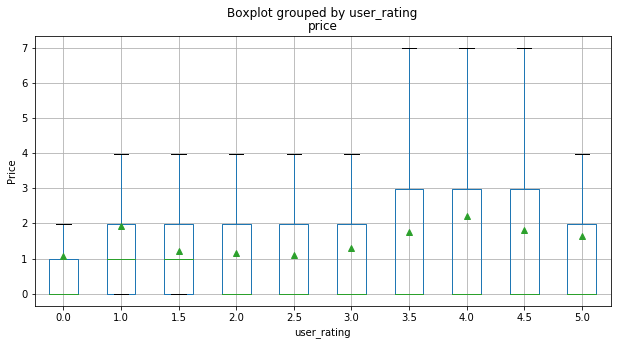

In [38]:
df.boxplot(column=['price'], by='user_rating',
           showfliers=False, showmeans=True, figsize=(10,5))
plt.ylabel('Price');

可以看到大部分评分的中位数都是免费的 0，说明免费应用占据了很大部分，不容易观察出收费应用的情况，所以筛选出收费应用来再探索一下：

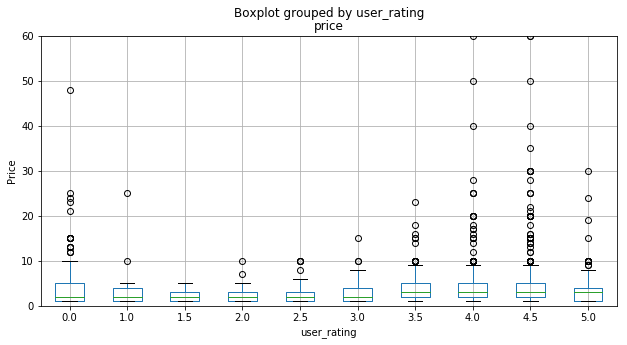

In [39]:
df[df['price']>0].boxplot(column=['price'],
                          by='user_rating',figsize=(10,5))
plt.ylim(0,60)
plt.ylabel('Price');

可以从图中看到，价格较高的一些离群值出现在 3.5 分以上的评分中比较多，0 分的情况下，也比 1-3 分的情况下要多。看箱线区域，0 分也与 3.5-4.5 的评分分布类似。这个现象比较有趣，猜测可能如果是价格较高的 APP，如果让用户失望，可能会更倾向于评 0 分，而不是一些中间的分数。

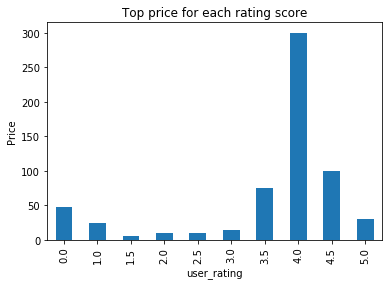

In [40]:
df.groupby('user_rating')['price'].max().plot.bar()
plt.title('Top price for each rating score')
plt.ylabel('Price');

每个评分的最大值探索，可以看到，最高价格的几个APP都分布在0分以及3.5分以上。与箱线图的结论相似。
### 探索游戏应用与价格的关系

In [41]:
df.groupby(['price_cut','is_Game']).size().unstack()

is_Game,Games,NotGames
price_cut,,
Free,2257,1799
USD:0~5,1372,1331
USD:5~20,230,172
USD:20+,3,33


这样可以将长格式的数据转换为宽格式，用来制作组合状图对比：

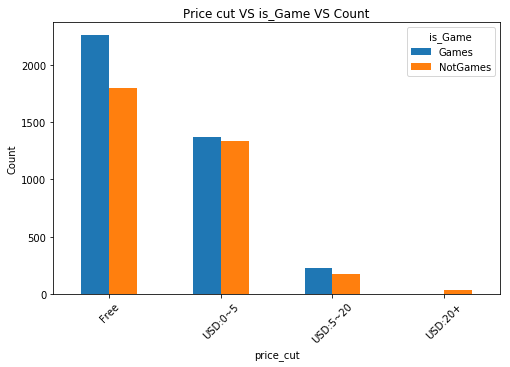

In [42]:
df.groupby(['price_cut','is_Game']).size().unstack().plot.bar(figsize=(8,5))
plt.title('Price cut VS is_Game VS Count')

# 控制 x 轴刻度文字的角度
plt.xticks(rotation=45)
plt.ylabel('Count');

从图中可以看出，免费应用中游戏应用比例较高，非免费应用的分布较为接近。

### 探索游戏应用与评分的关系

In [43]:
df.groupby(['user_rating','is_Game']).size().unstack()

is_Game,Games,NotGames
user_rating,,
0.0,462,467
1.0,15,29
1.5,10,46
2.0,29,77
2.5,44,152
3.0,133,250
3.5,301,401
4.0,927,699
4.5,1664,999


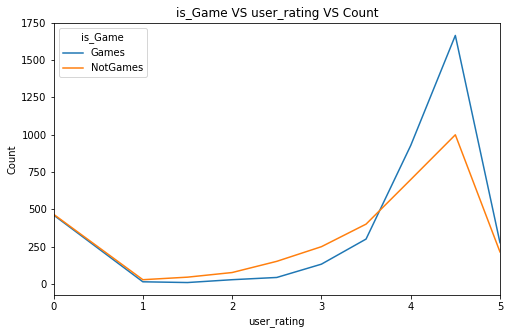

In [44]:
df.groupby(['user_rating','is_Game']).size().unstack().plot(figsize=(8,5))
plt.title('is_Game VS user_rating VS Count')
plt.ylabel('Count');

图中可以看出，在3.5分之前，都是非游戏应用较多，3.5分之后则是游戏应用较多。

## 总结

- 所有 APP 中，大部分都小于 5 美元。免费应用占比为 56.4%，占据一半以上。
- 经过散点图探索和相关系数的计算，可以看到价格和评分没有明显的线性相关性。在深入探索后，可以发现价格较高的 APP 的评分比较极端，0分或者 3.5分以上。猜测可能如果是价格较高的 APP，如果让用户失望，可能会更倾向于评 0 分，而不是一些中间的分数。
- 免费应用中游戏应用比例较高，非免费应用中，游戏与非游戏类应用的比例则比较相似。
- 游戏/非游戏类应用与评分的关系：在 3.5分之前，都是非游戏应用较多，3.5分之后则是游戏应用较多。

### 局限性

- 当前探索的问题主要集中在价格、评分、游戏分类这些特征，其他特征没有进行过多的探索。
- 根据对 APP 商店的了解，一些新上架的应用，评价应该会比较少，有可能有一些偶然情况不能了解到，评分结合评分人数应该会有更加准确的信息。
- 本次分析的过程只是使用了可视化探索和一些简单的统计计算，所以目前的结论只是暂时的，还有进一步分析的可能性。
